In [19]:
# Imports

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [6]:
# Getting Dataset
from sklearn.datasets import load_boston

In [7]:
# Load the housing dataset
boston = load_boston()


In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Number of houses')

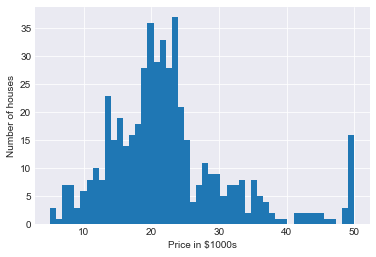

In [20]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

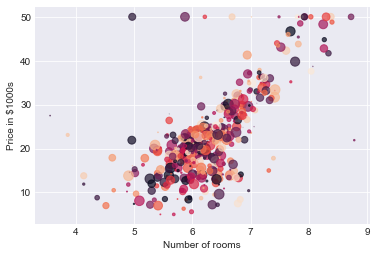

In [53]:
# Plot the column at the 5 index (Labeled RM)

N = 506
x = boston.data[:,5]
y = boston.target
colors = np.random.rand(N)
area = (10 * np.random.rand(N))**2  # 0 to 10 point radii

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

plt.scatter(x, y, s=area, c=colors, alpha=0.7)
plt.show()

# Great! Now we can make out a slight trend that price increases along with the number of rooms in that house, 
# which intuitively makes sense!
# Now let's use scikit learn to see if we can fit the data linearly.


In [56]:
# Let's try to do the following:

# 1.) Use pandas to transform the boston dataset into a DataFrame: 
# 2.) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

# reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# label columns
boston_df.columns = boston.feature_names

#show
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [57]:
# Set price column for target

boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


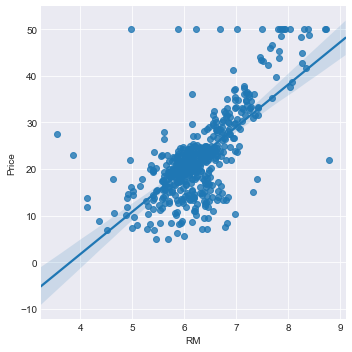

In [62]:
# Using seabron to create a linear fit
sns.lmplot('RM','Price',data = boston_df)


In [ ]:
# Numpy has a built in Least Square Method in its linear algebra library.
# We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.

# We will start by setting up the X and Y arrays for numpy to take in.
# An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the 
# different example values, and the second dimension is the attribute number. 
# In this case we have our value as the mean number of rooms per house, 
# and this is a single attribute so the second dimension of the array is just 1.
# So we'll need to create a (506,1) shape array. There are a few ways to do this, 
# but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [64]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
Y = boston_df.Price

In [66]:
# This is the same as the first equation if you carry out the linear algebra. 
# So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], 
# so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [67]:
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )

In [68]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


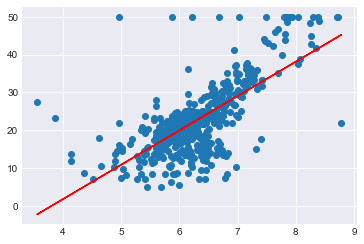

In [69]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [74]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

# Since the root mean square error (RMSE) corresponds approximately to the standard deviation we
# can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time.
# Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this link.
# Thus we can reasonably expect a house price to be within $13,200 of our line fit.

The root mean squared error was 6.60 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [ ]:
# Using scikit learn to implement a multivariate regression

In [77]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [78]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [80]:
# The functions we will be using are:

# lreg.fit() which fits a linear model
# lreg.predict() which is used to predict Y using the linear model with estimated coefficients
# lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, learn more about it here
# We'll start the multi variable regression analysis by seperating our boston dataframe into the data columns and the target columns:

In [81]:
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

In [82]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 36.49 


In [84]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 13 


In [88]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [86]:
# Just like we initially plotted out, it seems the highest correlation 
# between a feature and a house price was the number of rooms.
# Now let's move on to Predicting prices!

In [89]:
# Using Training and Validation: 
# scikit learn has a built in function specifically for this called train_test_split.
#The parameters passed are your X and Y, then optionally test_size parameter, 
# representing the proportion of the dataset to include in the test split. As well a train_size parameter. 

In [91]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [92]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [93]:
# Now that we have our training and testing sets, let's go ahead and try to use them to predict house prices.
# We'll use our training set for
# the prediction and then use our testing set for validation.


In [94]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
# Now run a prediction on both the X training set and the testing set.
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [96]:
# Now we will get the mean square error
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 46.10
Fit a model X_train, and calculate MSE with X_test and Y_test: 37.10


Text(0.5,1,'Residual Plots')

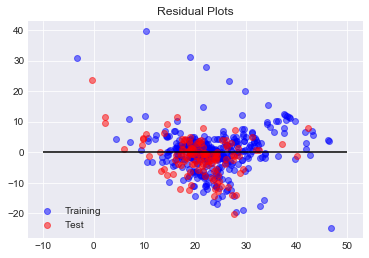

In [97]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')